In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<h1 style="color: red; text-align:center; background-color: #dddddd; border: 1px solid black; padding: 10px;font-size: 36px;">Product Sales </h1>


## About Dataset
Greetings , fellow analyst !
REC corp LTD. is small-scaled business venture established in India. They have been selling FOUR PRODUCTS for OVER TEN YEARS .
The products are P1, P2, P3 and P4.
They have collected data from their retail centers and organized it into a small csv file , which has been given to you.
**The excel file contains about 8 numerical parameters : **

* Q1- Total unit sales of product 1
* Q2- Total unit sales of product 2
* Q3- Total unit sales of product 3
* Q4- Total unit sales of product 4
* S1- Total revenue from product 1
* S2- Total revenue from product 2
* S3- Total revenue from product 3
* S4- Total revenue from product 4

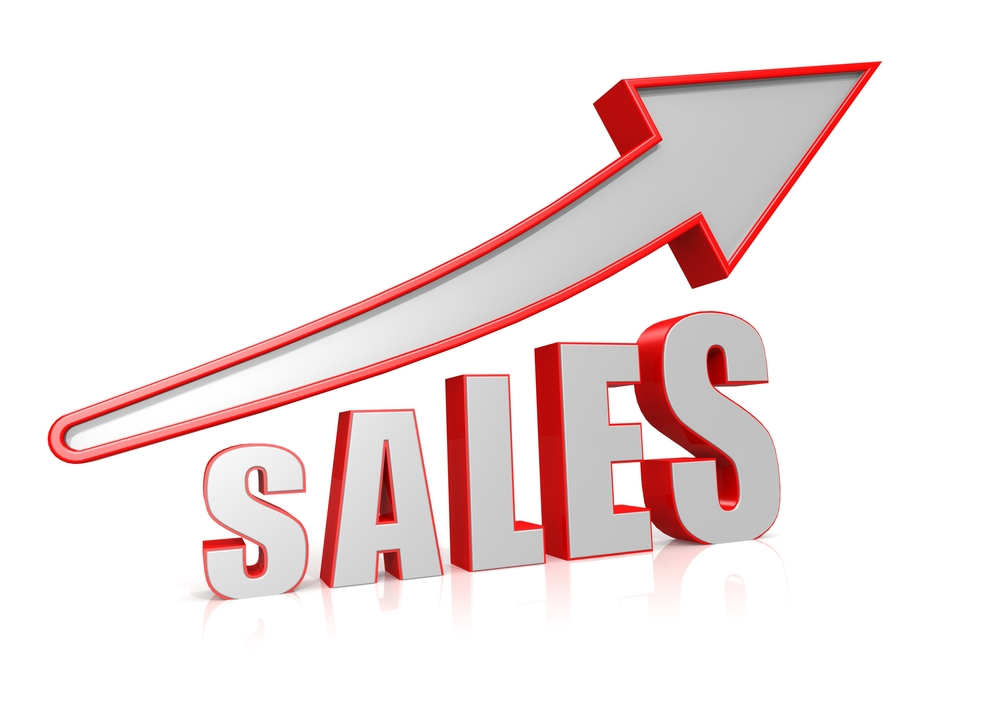

#### Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns=50
sns.set(style="darkgrid")

#### Importing data

In [ ]:
df=pd.read_csv("/kaggle/input/product-sales-data/statsfinal.csv")
df.head(5)

## Workflow
* Understanding the data
* Data cleaning
* Exploratory Data Analysis
* Insights 

<h1 style="color: red; text-align:center; background-color: #dddddd; border: 1px solid black; padding: 10px;">Understanding the data </h1>


In [ ]:
# Fethcing rows and columns
df.shape

In [ ]:
# fetching column names
df.columns

In [ ]:
# basic info
df.info()

In [ ]:
# Checking null values
df.isnull().sum()

#### No Null values

In [ ]:
# Checking Dtypes
df.dtypes

#### date is in object we have to change it to datetime 

In [ ]:
df.duplicated().sum()

#### There is no duplicate values

In [ ]:
## Basic statistical info
df.describe().T

<h1 style="color: red; text-align:center; background-color: #dddddd; border: 1px solid black; padding: 10px;">Data Cleaning </h1>


In [ ]:
df.sample(2)

In [ ]:
# Changing dtype 
from datetime import datetime as dt
df[df["Date"]=="31-9-2010"]




In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [ ]:
df[df['Date'].isnull()]

In [ ]:
## Filling the NaT  values with average of time
df["Date"].fillna(df["Date"].mean(),inplace=True)

In [ ]:
df['Date'].isnull().sum()

In [ ]:
df.dtypes

In [ ]:
#fetching month,day of week, weekday
df["month"]=df["Date"].dt.month_name()
df["day"]=df["Date"].dt.day_name()
df["dayoftheweek"]=df["Date"].dt.weekday
df["year"]=df["Date"].dt.year
df.sample()

In [ ]:
## Droping column unnamed as it is not usefull for us
df.drop(columns=["Unnamed: 0"],inplace=True)
df.sample()

In [ ]:
df.corr().T

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

#### There is no strong correlation between the columns

In [ ]:
for i in df.columns:
    print(i,"---------",df[i].unique())

<h1 style="color: red; text-align:center; background-color: #dddddd; border: 1px solid black; padding: 10px;">Exploratory Data Analysis </h1>


In [ ]:
df.sample()

In [ ]:
# Total unit sales Product 1, Product 2, Product 3, Product 4 
q = df[["Q-P1","Q-P2","Q-P3","Q-P4"]].sum()
print(q)
plt.figure(figsize=(8,8))
plt.pie(q,labels=df[["Q-P1","Q-P2","Q-P3","Q-P4"]].sum().index,shadow=True,autopct="%0.01f%%",textprops={"fontsize":20},wedgeprops={'width': 0.8},explode=[0,0,0,0.3])
plt.legend(loc='center right', bbox_to_anchor=(1.2, 0.8));

In [ ]:
# Total Revenue percent from sales from Product 1, Product 2, Product 3, Product 4  
s=df[["S-P1","S-P2","S-P3","S-P4"]].sum()
print(s)
plt.figure(figsize=(8,8))
plt.pie(s,labels=df[["S-P1","S-P2","S-P3","S-P4"]].sum().index,shadow=True,autopct="%0.01f%%",textprops={"fontsize":20},wedgeprops={'width': 0.8},explode=[0,0,0,0.3])
plt.legend(loc='center right', bbox_to_anchor=(1.2, 0.8))

In [ ]:
# which is the most occuring month 
print(df["month"].value_counts())
plt.figure(figsize=(10,10))
sns.countplot(x="month",data=df,edgecolor="black")
plt.xticks(rotation=90);

In [ ]:
# which is the most occuring Day 
print(df["day"].value_counts())
plt.figure(figsize=(10,10))
sns.countplot(x="day",data=df,edgecolor="black")
plt.xticks(rotation=90);

In [ ]:
# which is the most occuring year 
print(df["year"].value_counts())
plt.figure(figsize=(10,10))
sns.countplot(x="year",data=df,edgecolor="black")
plt.xticks(rotation=90);

In [ ]:
# Monthly distrubution of revenue 
sns.relplot(x="month",y="S-P1",data=df,kind="line",height=10,color="red")
plt.xticks(rotation=90);
sns.relplot(x="month",y="S-P2",data=df,kind="line",height=10,color="blue")
plt.xticks(rotation=90);
sns.relplot(x="month",y="S-P3",data=df,kind="line",height=10,color="green")
plt.xticks(rotation=90);
sns.relplot(x="month",y="S-P4",data=df,kind="line",height=10,color="purple")
plt.xticks(rotation=90);

In [ ]:
## In which month revenue was it peak
df.groupby("month")[["S-P1","S-P2","S-P3","S-P4"]].sum()

In [ ]:
plt.figure(figsize=(15,15),dpi=100)
plt.subplot(2,2,1)
sns.barplot(x="month",y="S-P1",data=df,edgecolor="black",estimator=sum)
plt.xticks(rotation=90);
plt.subplot(2,2,2)
sns.barplot(x="month",y="S-P2",data=df,edgecolor="black",estimator=sum)
plt.xticks(rotation=90);
plt.subplot(2,2,3)
sns.barplot(x="month",y="S-P3",data=df,edgecolor="black",estimator=sum)
plt.xticks(rotation=90);
plt.subplot(2,2,4)
sns.barplot(x="month",y="S-P4",data=df,edgecolor="black",estimator=sum)
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=0.3);

In [ ]:
df.sample()

In [ ]:
## In which month unit sales were more in Product 1, Product 2, Product 3, Product 4 
df.groupby ("month")[["Q-P1","Q-P2","Q-P3","Q-P4"]].sum()


In [ ]:
plt.figure(figsize=(15,15),dpi=100)
plt.subplot(2,2,1)
sns.barplot(x="month",y="Q-P1",data=df,edgecolor="black",estimator=sum)
plt.xticks(rotation=90);
plt.subplot(2,2,2)
sns.barplot(x="month",y="Q-P2",data=df,edgecolor="black",estimator=sum)
plt.xticks(rotation=90);
plt.subplot(2,2,3)
sns.barplot(x="month",y="Q-P3",data=df,edgecolor="black",estimator=sum)
plt.xticks(rotation=90);
plt.subplot(2,2,4)
sns.barplot(x="month",y="Q-P4",data=df,edgecolor="black",estimator=sum)
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=0.3);

In [ ]:
week_t=df[df["dayoftheweek"]<5]
weekend_t=df[df["dayoftheweek"]>=5]
print(week_t.groupby("day")[["S-P1","S-P2","S-P3","S-P4"]].sum())


In [ ]:
plt.figure(figsize=(10,10),dpi=100)
plt.subplot(2,2,1)
sns.barplot(x="day",y="S-P1",data=week_t,edgecolor="black",estimator=sum)
plt.xticks(rotation=45);
plt.subplot(2,2,2)
sns.barplot(x="day",y="S-P2",data=week_t,edgecolor="black",estimator=sum)
plt.xticks(rotation=45);
plt.subplot(2,2,3)
sns.barplot(x="day",y="S-P3",data=week_t,edgecolor="black",estimator=sum)
plt.xticks(rotation=45);
plt.subplot(2,2,4)
sns.barplot(x="day",y="S-P4",data=week_t,edgecolor="black",estimator=sum)
plt.xticks(rotation=45)
plt.subplots_adjust(hspace=0.5);

In [ ]:
print(weekend_t.groupby("day")[["S-P1","S-P2","S-P3","S-P4"]].sum())

In [ ]:
plt.figure(figsize=(10,10),dpi=100)
plt.subplot(2,2,1)
sns.barplot(x="day",y="S-P1",data=weekend_t,edgecolor="black",estimator=sum)
plt.xticks(rotation=45);
plt.subplot(2,2,2)
sns.barplot(x="day",y="S-P2",data=weekend_t,edgecolor="black",estimator=sum)
plt.xticks(rotation=45);
plt.subplot(2,2,3)
sns.barplot(x="day",y="S-P3",data=weekend_t,edgecolor="black",estimator=sum)
plt.xticks(rotation=45);
plt.subplot(2,2,4)
sns.barplot(x="day",y="S-P4",data=weekend_t,edgecolor="black",estimator=sum)
plt.xticks(rotation=45)
plt.subplots_adjust(hspace=0.5);

In [ ]:
# In which year revenue was the highest 
df.groupby("year")[["S-P1","S-P2","S-P3","S-P4"]].agg(["sum"])

In [ ]:
plt.figure(figsize=(10,10),dpi=100)
plt.subplot(2,2,1)
sns.barplot(x="year",y="S-P1",data=df,edgecolor="black",estimator=sum)
plt.xticks(rotation=90);
plt.subplot(2,2,2)
sns.barplot(x="year",y="S-P2",data=df,edgecolor="black",estimator=sum)
plt.xticks(rotation=90);
plt.subplot(2,2,3)
sns.barplot(x="year",y="S-P3",data=df,edgecolor="black",estimator=sum)
plt.xticks(rotation=90);
plt.subplot(2,2,4)
sns.barplot(x="year",y="S-P4",data=df,edgecolor="black",estimator=sum)
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=0.5);

In [ ]:
## What was the avg revenue, maximum and min
df[["S-P1","S-P2","S-P3","S-P4"]].agg(["sum","max","min","mean"])

In [ ]:
plt.figure(figsize=(10,10),dpi=100)
plt.subplot(2,2,1)
sns.barplot(x="day",y="Q-P1",data=week_t,edgecolor="black",estimator=sum)
plt.xticks(rotation=45);
plt.subplot(2,2,2)
sns.barplot(x="day",y="Q-P2",data=week_t,edgecolor="black",estimator=sum)
plt.xticks(rotation=45);
plt.subplot(2,2,3)
sns.barplot(x="day",y="Q-P3",data=week_t,edgecolor="black",estimator=sum)
plt.xticks(rotation=45);
plt.subplot(2,2,4)
sns.barplot(x="day",y="Q-P4",data=week_t,edgecolor="black",estimator=sum)
plt.xticks(rotation=45)
plt.subplots_adjust(hspace=0.5);

In [ ]:
plt.figure(figsize=(10,10),dpi=100)
plt.subplot(2,2,1)
sns.barplot(x="day",y="Q-P1",data=weekend_t,edgecolor="black",estimator=sum)
plt.xticks(rotation=45);
plt.subplot(2,2,2)
sns.barplot(x="day",y="Q-P2",data=weekend_t,edgecolor="black",estimator=sum)
plt.xticks(rotation=45);
plt.subplot(2,2,3)
sns.barplot(x="day",y="Q-P3",data=weekend_t,edgecolor="black",estimator=sum)
plt.xticks(rotation=45);
plt.subplot(2,2,4)
sns.barplot(x="day",y="Q-P4",data=weekend_t,edgecolor="black",estimator=sum)
plt.xticks(rotation=45)
plt.subplots_adjust(hspace=0.5);

In [ ]:
from wordcloud import WordCloud as word
d=df[["S-P1","S-P2","S-P3","S-P4"]].sum()
wc = word(background_color='white', width=1000, height=600)
wc.generate_from_frequencies(d)
plt.figure(figsize=(15,15),dpi=100)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
q=df[["Q-P1","Q-P2","Q-P3","Q-P4"]].sum()
wc = word(background_color='white', width=1000, height=600)
wc.generate_from_frequencies(q)
plt.figure(figsize=(15,15),dpi=100)
plt.imshow(wc)
plt.axis('off')
plt.show()

<h1 style="color: red; text-align:center; background-color: #dddddd; border: 1px solid black; padding: 10px;">Insights </h1>

* Added columns month, day and day of the week and changing the dtype of date from object to datetime64 through feature engineering.
* Drop columns unnamed as it was not providing any usefull information.
* S-P3 has gained the most revenue but the unit sale of Q-P1 is more.
* In 2016 most revenue most revenue generated and on fridays and staurdays most revenue generated.
* On Weekdays and weekend the S-P3 has the highest revenue whereas on weekend and weekday the Q-P1 has more unit sales.
* In month of October unit sale and revenue was at peak.

